## Balancing Cases 
This notebook serves to illustrate various possible control flow graphs and how they are balanced

In [3]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys
# add project root to path 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/notebooks


In [9]:
%autoreload 2
import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg


def to_png(graph, name="temp"):
    out_file = os.path.abspath(f"./{name}.dot")
    nx.drawing.nx_agraph.write_dot(graph, out_file)
    cmd = f"dot -Tpng {out_file} -o {name}.png"
    os.system(cmd)
    img = mpimg.imread(f"{name}.png")
    plt.figure(figsize = (10,10))
    plt.imshow(img)


## Case 1: simple if-else statement
source code: 

```
int main(){
        int secret = 20; 
        if (secret < 10){
                return 0; 
        } else{ 
                return 1; 
        } 
}
```

control flow graph: 

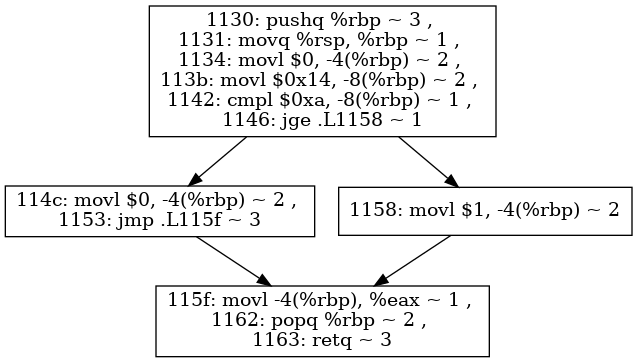

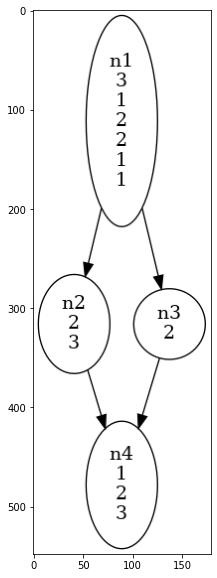

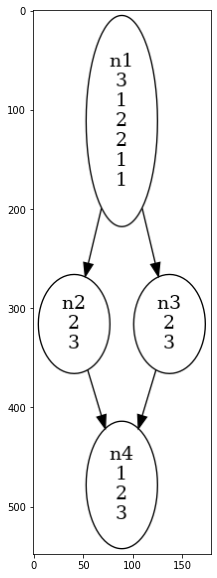

In [15]:
%autoreload 2 
from rwtools.nemesis.graph.balance import * 

G = nx.DiGraph()
n1 = AbstractNemesisNode([3, 1, 2, 2, 1, 1], "n1")
n2 = AbstractNemesisNode([2, 3], "n2")

n3 = AbstractNemesisNode([2], "n3")
n4 = AbstractNemesisNode([1, 2, 3], "n4")

G.add_nodes_from([n1, n2, n3, n4])


G.add_edges_from([(n1, n2), (n1, n3), (n2, n4), (n3, n4)])

to_png(G, "if_else")
balance_branching_point(G,  n1)
to_png(G, "if_else_balanced")